<a href="https://colab.research.google.com/github/nikenaml/gai-bai-bo-game-architecture/blob/master/image-classification-cnn-architecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Personal Information

    Nama     : Niken Amelia
    Email    : niken.aml99@gmail.com
    No. HP   : 085311321124
    LinkedIn : https://www.linkedin.com/in/nikenamelia/
    Github   : https://github.com/nikenaml

# Load Dataset

In [32]:
# before using tensorflow, first check the version of the module you are using
import tensorflow as tf
print(tf.__version__)

2.5.0


In [33]:
# download dataset and create temporary place with zip filename
!wget --no-check-certificate \
   https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
   -O /tmp/rps.zip

--2021-07-14 23:44:14--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 307.92M  7.92MB/s    in 55s     

2021-07-14 23:45:10 (5.56 MB/s) - ‘/tmp/rps.zip’ saved [322873683/322873683]



In [38]:
# extract the zip file
import zipfile

tmp_zip = '/tmp/rps.zip'

rps_zip = zipfile.ZipFile(tmp_zip, 'r')
rps_zip.extractall('/content/drive/My Drive')
rps_zip.close()

In [39]:
import os

In [40]:
# check the data in the directory
os.listdir('/content/drive/My Drive/rockpaperscissors/rps-cv-images')

['README_rpc-cv-images.txt', 'paper', 'scissors', 'rock']

# Data Splitting

Specifies the storage directory of the entire dataset

In [41]:
# install package the necessary packages
!pip install split-folders

In [42]:
import splitfolders
root_dir = '/content/drive/My Drive/rockpaperscissors/rps-cv-images'
splitfolders.ratio(root_dir, output = "/content/drive/My Drive/rockpaperscissors", ratio = (.6, .4))

# Create initial directory for training data and validation data
# train_dir = os.path.join("/content/drive/My Drive/rockpaperscissors", "train")
# validation_dir = os.path.join("/content/drive/My Drive/rockpaperscissors", "val")

Copying files: 2188 files [00:00, 2226.41 files/s]


## Preview image for data splitting

In [46]:
# Specify the storage directory for each label
train = {}
test = {}

path = "/content/drive/My Drive/rockpaperscissors/"

# Make dictionary storing images for each category under train data.
path_train = os.path.join(path, "train")
for i in os.listdir(path_train):
    train[i] = os.listdir(os.path.join(path_train, i))

# Make dictionary storing images for each category under test data.
path_test = os.path.join(path, "val")
for i in os.listdir(path_test):
    test[i] = os.listdir(os.path.join(path_test, i))

## Check values of data splitting

In [47]:
sum(len(v) for v in train.values())

1312

In [48]:
 sum(map(len, test.values()))

876

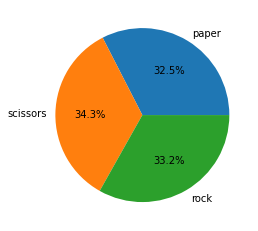

In [49]:
# Make a pie-chart to visualize the percentage contribution of each category.
# This is often useful when you want your dataset to be balanced.
fig, ax = plt.subplots()
ax.pie(
    [len(train[item]) for item in train],
    labels = train.keys(),
    autopct = "%1.1f%%"
)
fig.show()

# Image Preprocessing

- Create an image data generator (preprocessing, image object labeling & image augmentation) to prepare training data and data validation
- This step is for the image augmentation process in order to be able to create new data from existing data

Enhance the image by scaling it to 1/255 and applying a horizontal and vertical flip.

In [50]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=10,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode="nearest")

test_datagen = ImageDataGenerator(rescale = 1/255)

Prepare train data and data validation to be learned by the model

In [51]:
# Put the image data generator in the train_dir & validation_dir variables
train_generator = train_datagen.flow_from_directory(
        path_train,
        target_size=(200, 300),
        batch_size=32,
        class_mode='categorical',
        seed=42)

validation_generator = test_datagen.flow_from_directory(
        path_test,
        target_size=(200, 300),
        batch_size=32,
        class_mode='categorical',
        seed=42)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


# Modeling

Neural network model creation and training

In [62]:
# Create a 2D CNN architecture model
import tensorflow as tf

# Create mock conditional network for CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 300, 3)), # Added the first CNN layer
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'), # Added second CNN layer
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), # Added third CNN layer
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'), # Added fourth CNN layer
    tf.keras.layers.MaxPooling2D(2,2),
    # tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'), # Added fifth CNN layer
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'), # Create hidden layers
    tf.keras.layers.Dense(3, activation='softmax') # Adding an output layer                       
])

In [63]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 198, 298, 16)      448       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 99, 149, 16)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 97, 147, 32)       4640      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 48, 73, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 46, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 23, 35, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 21, 33, 128)      

## Use of RMSprop optimizer and loss categorical_crossentropy

In [64]:
# Compile CNN  with opt, loss, dan matrics score
# optimizer RMSprop dan loss categorical_crossentropy
rmsprop = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy'
              ,optimizer=rmsprop
              ,metrics=['accuracy'])

In [65]:
from tensorflow.keras.callbacks import *

# Call Back class to stop the Training process of Model if accuracy of training reaches 92%
# callback

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.97 and logs.get('val_accuracy')>0.97):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 97%!")
callbacks = myCallback()

In [66]:
# Using early stopping to exit training if validation loss is not decreasing even after certain epochs (patience)
earlystopping = EarlyStopping(
    monitor = 'val_loss', 
    verbose = 1, 
    patience = 20
)

# save the best model with lower loss
checkpointer = ModelCheckpoint(
    filepath = "weights.hdf5", 
    verbose = 1, 
    save_best_only = True
)

# https://stackoverflow.com/questions/56687658/keras-earlystopping-is-not-recognized

In [67]:
import time
time_array = []

start_time = time.time()

# Start the training of Neural Network
# fit the neural network model to the data.
history = model.fit(
      train_generator,
      steps_per_epoch=train_generator.samples // train_generator.batch_size,
      epochs=50,
      batch_size = 32,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples // validation_generator.batch_size,
      verbose=1,
      callbacks=[callbacks, checkpointer, earlystopping], # Fit the model passing it the callback we created
      )

print("--- %.2f menit ---" % ((time.time() - start_time)/60))
time_array.append(time.time() - start_time)

Epoch 1/50
41/41 [==============================] - 128s 3s/step - loss: 0.9584 - accuracy: 0.5556 - val_loss: 0.7192 - val_accuracy: 0.7766

Epoch 00001: val_loss improved from inf to 0.71922, saving model to weights.hdf5
Epoch 2/50
41/41 [==============================] - 125s 3s/step - loss: 0.5472 - accuracy: 0.8232 - val_loss: 0.4273 - val_accuracy: 0.8542

Epoch 00002: val_loss improved from 0.71922 to 0.42731, saving model to weights.hdf5
Epoch 3/50
41/41 [==============================] - 125s 3s/step - loss: 0.3714 - accuracy: 0.8796 - val_loss: 0.3146 - val_accuracy: 0.8912

Epoch 00003: val_loss improved from 0.42731 to 0.31459, saving model to weights.hdf5
Epoch 4/50
41/41 [==============================] - 127s 3s/step - loss: 0.3020 - accuracy: 0.9047 - val_loss: 0.4755 - val_accuracy: 0.8426

Epoch 00004: val_loss did not improve from 0.31459
Epoch 5/50
41/41 [==============================] - 127s 3s/step - loss: 0.2688 - accuracy: 0.9062 - val_loss: 0.3397 - val_accura

# Plot Visualization Accuracy and Loss Each Epoch

- Make a visualization of the results of the neural network between loss, validation loss and accuracy, validation accuracy


In [68]:
# define function plot visualization training and validation process
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    print("Training Accuracy: %.2f" % acc[-1])
    print("Training Loss: %.2f" % loss[-1])
    print("Validation Accuracy: %.2f" % val_acc[-1])
    print("Validation Loss: %.2f" % val_loss[-1] + '\n\n')

    # make a visualization of the results of the neural network between loss, validation loss and accuracy, validation accuracy
    plt.figure(figsize=(15, 5))

    # create visualizations for accuracy values in the training and validation process
    plt.subplot(1, 2, 1)
    plt.plot(acc, 'b', label='Train acc')
    plt.plot(val_acc, 'r', label='Validation acc')
    plt.title('Train and validation accuracy Visualization')
    plt.xlabel("Jumlah Epochs")
    plt.legend()

    # create visualizations for loss values in the training and validation process
    plt.subplot(1, 2, 2)
    plt.plot(loss, 'b', label='Train loss')
    plt.plot(val_loss, 'r', label='Validation loss')
    plt.title('Train and validation loss Visualization')
    plt.legend()

Training Accuracy: 0.97
Training Loss: 0.07
Validation Accuracy: 0.97
Validation Loss: 0.09




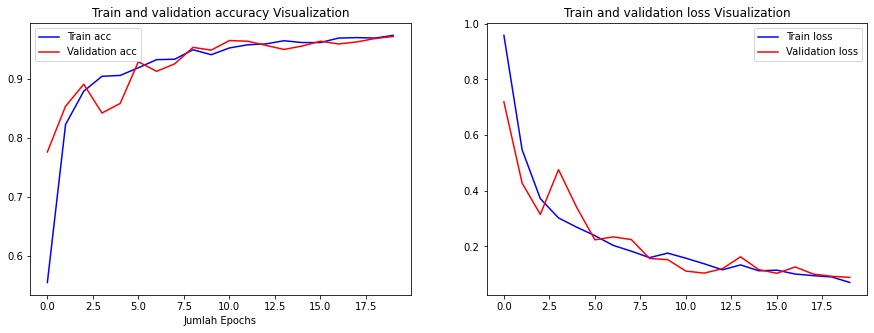

In [69]:
plot_history(history)

# Predicting Image

In [70]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
%matplotlib inline

Saving gunting-ijo.jpg to gunting-ijo.jpg


Nama file kamu adalah: gunting-ijo.jpg
Kamu telah mengeluarkan gunting


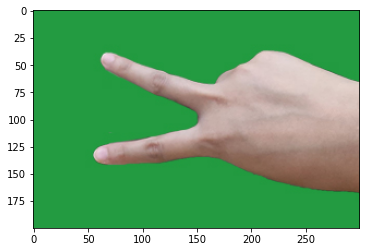

In [71]:
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(200,300))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  y_classes = classes.argmax(axis=-1)


  print('\n\nNama file kamu adalah: ' + fn)
  if y_classes==0:
    print('Kamu telah mengeluarkan kertas')
  elif y_classes==1:
    print('Kamu telah mengeluarkan batu')
  else:
    print('Kamu telah mengeluarkan gunting')


# Summary

In this Submission, we use the optimizer type, loss function and change the learning_rate value that is different from the previous exercise, namely the RMSprop Optimizer with the value loss='categorical_crossentropy and learning_rate = 0.0001

1. This model has a train accuracy of ~97% and a validation accuracy of ~97%.
2. Using the RMSprop Optimizer with loss='categorical_crossentropy and changing the learning_rate value resulted in stable and good test and training scores.
3. In my opinion, when predicting an image, the model will give good prediction results when the uploaded image has a green screen background but when the image does not have a green screen background, the prediction results often do not match. This is because the dataset used for training has a uniform background so that the model only recognizes the green screen background.
4. In addition, the shooting position can also affect the prediction results, if the image position is different from the sample dataset (because the model learns from the existing data) which causes the model to produce an incorrect image prediction. However, this problem can still be solved by adding a complete set of data containing hand-drawn shapes and sizes from various position directions to minimize errors in handling new test data.
5. The assumption obtained is that the sample image used in the test must be similar to the sample image in the training process, in terms of the shooting position with the shape of the image on the image, so that the model is able to predict the image.